In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
df = pd.read_csv('mxmh_survey_results.csv')

# Data clean and preprocessing

In [53]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [54]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [55]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [56]:
#Check for null values in the fields that we are going to use for analysis

In [57]:
print(df['Age'].isnull().values.any())

True


In [58]:
print(df['Anxiety'].isnull().values.any())

False


In [59]:
print(df['Depression'].isnull().values.any())

False


In [60]:
print(df['Insomnia'].isnull().values.any())

False


In [61]:
print(df['OCD'].isnull().values.any())

False


In [62]:
df['Age'].mean()

25.206802721088437

In [63]:
#Since there is are nan values for Age, we are going to replae it with the mean value of age
df['Age'] = df['Age'].fillna(25)

In [64]:
print(df['Age'].isnull().values.any())

False


In [65]:
# split data into X and y
feature_names = ['Age','Anxiety','Depression','Insomnia','OCD']
X = df[feature_names]
y_copy = df['Fav genre']

In [71]:
selected_df = df[['Fav genre','Hours per day', 'Age','Anxiety','Depression','Insomnia','OCD']]

In [72]:
selected_df.head()

,Fav genre,Hours per day,Age,Anxiety,Depression,Insomnia,OCD
0,Latin,3.0,18.0,3.0,0.0,1.0,0.0
1,Rock,1.5,63.0,7.0,2.0,2.0,1.0
2,Video game music,4.0,18.0,7.0,7.0,10.0,2.0
3,Jazz,2.5,61.0,9.0,7.0,3.0,3.0
4,R&B,4.0,18.0,7.0,2.0,5.0,9.0


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
#Lebel the unique values - from the xgboost latest version it only accepts numbered values as labels
df['Fav genre'] = le.fit_transform(df['Fav genre'])
Y = df['Fav genre']

In [18]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,8,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,14,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,15,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,6,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,12,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [19]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size =test_size ,random_state=seed)

# Scaling

In [20]:
#apply scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xgboost

In [21]:
#Xgboost analysis
from xgboost import XGBClassifier

In [22]:
# fit model no training data
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [23]:
# make predictions for test data
y_pred_xg = model_xg.predict(X_test)

In [24]:
print(y_pred_xg)

[ 6  6  5  3 11  0 10 10 14 11 14 14 11 10  5  6 11  0 14 15  5  3 14 11
 14  1 14 14 14 11  0 15  0  0 14  5  6 14  0  6  0 11  0  1 10 11 14 15
 10 15 14  0 11 10 14  0 14 15  6 14 11 10 14 10 14 14 12  1  0 11 11  0
 11 10 14  2 14 14  1 14 14 15 15 11 14 11 15  1 14  2 11 14 11 14  0 14
  0  2 10  3  5 15  5 11  1 11 14  3  5 14 12 14 14 14 11 14 14  0 14 11
  0 10 11 15 11 14 14 14  1  2 10  0 11 11 12 14 14 14 14 11 11 14 11 14
 14 13 14 14  5  9 15 11 14 10 11 11 13 14 14 14 11  3 11 14 14  5 14 11
 14 11 14 11 14 11 11 11 14 15 14  2 11 14  6 11  5  2 14 14  2 11 11  2
 11  9 14  2 10  0 14 14 10 11 11  9 14 14  2  1  1  0 14  2  5 11 10 11
 10 14 14  8 11 14  7 15 14 11 14  3 11  5  5 11 15  6  0 10 14 14 10 11
  7 14 14]


In [25]:
# evaluate predictions
print('Accuracy of XGBoost on training set: {:.2f}'
     .format(model_xg.score(X_train, y_train)))
print('Accuracy of XGBoost on test set: {:.2f}'
     .format(model_xg.score(X_test, y_test)))
accuracy = accuracy_score(y_test, y_pred_xg)
print("XGBoost - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of XGBoost on training set: 0.99
Accuracy of XGBoost on test set: 0.16
XGBoost - Accuracy for Fav genre: 16.46%


# Linear Regression

In [26]:
#Liner Regression
from sklearn.linear_model import LinearRegression

In [27]:
model_lreg = LinearRegression()
model_lreg.fit(X_train, y_train)

LinearRegression()

In [28]:
# make predictions for test data
y_pred_lreg = model_lreg.predict(X_test)

In [29]:
print(y_pred_lreg)

[ 8.99726904  8.96431041  9.6256583   8.99208893  9.32757529  8.54533809
  9.57582345  9.37655372  9.54648029  9.07366034  9.44588091 10.1646328
  9.47919302  8.88641105  8.73875163  9.05478047  8.72624891  8.95873323
 10.63161131  9.52580593  9.25607848  9.62301465  9.78066019  9.44049951
  9.68996921  9.79457797  9.69783527  9.48293142 10.20697084  9.3174551
  9.25240666  9.26310853  8.75859846  9.22556923  9.16781023  9.11174628
  8.73926947  9.95360667  8.34146492  8.66039614  8.59567266  9.13964481
  8.80960282  8.58359366  9.26346615  8.80795126 10.0004354   9.87425279
  9.17734282 10.96847695  8.70176258  8.62163627  9.56808391 10.14995374
  8.92059676  9.50953968  9.93601631  9.57613511  9.71357544  9.52629687
  8.78494948  9.63767583  9.58912715  9.84300502  9.33811306  9.721149
  9.03267741  7.89312383  8.7232832   9.3681345   9.38285952  9.5545504
  9.29454869  8.19884208 10.34828889  9.43972054 11.15642121 10.04236736
  9.13304209  9.71235853  9.91888186  8.77235678  9.2797

In [31]:
# evaluate predictions
print('Accuracy of Linear regression on training set: {:.2f}'
     .format(model_lreg.score(X_train, y_train)))
print('Accuracy of Linear regression on test set: {:.2f}'
     .format(model_lreg.score(X_test, y_test)))
# accuracy = accuracy_score(y_test, y_pred_lreg)
# print("Linear Regression - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of Linear regression on training set: 0.01
Accuracy of Linear regression on test set: -0.02


# Random Forest Regression

In [32]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

In [33]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
# make predictions for test data
y_pred_rfr = model_rfr.predict(X_test)
print(y_pred_lreg)

[ 8.99726904  8.96431041  9.6256583   8.99208893  9.32757529  8.54533809
  9.57582345  9.37655372  9.54648029  9.07366034  9.44588091 10.1646328
  9.47919302  8.88641105  8.73875163  9.05478047  8.72624891  8.95873323
 10.63161131  9.52580593  9.25607848  9.62301465  9.78066019  9.44049951
  9.68996921  9.79457797  9.69783527  9.48293142 10.20697084  9.3174551
  9.25240666  9.26310853  8.75859846  9.22556923  9.16781023  9.11174628
  8.73926947  9.95360667  8.34146492  8.66039614  8.59567266  9.13964481
  8.80960282  8.58359366  9.26346615  8.80795126 10.0004354   9.87425279
  9.17734282 10.96847695  8.70176258  8.62163627  9.56808391 10.14995374
  8.92059676  9.50953968  9.93601631  9.57613511  9.71357544  9.52629687
  8.78494948  9.63767583  9.58912715  9.84300502  9.33811306  9.721149
  9.03267741  7.89312383  8.7232832   9.3681345   9.38285952  9.5545504
  9.29454869  8.19884208 10.34828889  9.43972054 11.15642121 10.04236736
  9.13304209  9.71235853  9.91888186  8.77235678  9.2797

In [35]:
# evaluate predictions
print('Accuracy of Random Forest Regression on training set: {:.2f}'
     .format(model_rfr.score(X_train, y_train)))
print('Accuracy of Random Forest Regression on test set: {:.2f}'
     .format(model_rfr.score(X_test, y_test)))
# accuracy = accuracy_score(y_test, y_pred_rfr)
# print("Random Forest Regression - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of Random Forest Regression on training set: 0.83
Accuracy of Random Forest Regression on test set: -0.18


# KNeighbors Regression

In [36]:
#KNeighbors Regression
from sklearn.neighbors import KNeighborsRegressor

In [37]:
model_knr = KNeighborsRegressor()
model_knr.fit(X_train, y_train)

KNeighborsRegressor()

In [38]:
# make predictions for test data
y_pred_knr = model_knr.predict(X_test)
print(y_pred_knr)

[10.6  9.   6.2 10.2 10.6  8.4  9.  13.   9.4  9.   8.4 12.6 10.  10.6
  8.   9.6  8.6  9.6 11.4  9.4 10.6  7.4 10.8  9.8  8.8 11.8 10.6  9.4
 10.8 10.8  9.4  7.8  2.2  8.  10.8  9.2  6.6 13.   5.6  7.4  6.6 10.8
 11.6  6.  11.4 10.6  8.4 10.   6.4  8.2  9.2  5.8  9.   9.6  8.  11.2
  9.  12.4 11.2  6.2  8.6 10.4  9.6  5.8  9.   9.6 11.   6.4  5.6  8.6
  8.6 10.8 10.6  9.  13.4  7.   9.4 13.6  6.4 11.6 10.8  8.   9.6 11.8
  8.2 12.  10.4 11.4 14.2  7.   7.2 11.  10.4  9.4  9.4 11.2  8.2 10.4
  9.2 11.4  3.6 11.4 11.2 10.4  4.8 11.8 12.2  6.2  7.  10.6  8.8  8.6
  8.2 10.2 10.8  9.   5.8  9.   5.   7.8  8.8 11.8  8.4  9.   7.6  9.8
 10.2 12.6  9.2  8.2  8.6  6.8  8.2  5.2  8.4 10.  11.2 10.  12.2  8.4
  4.6 10.4 10.  12.   8.4  3.4 13.2  7.8  7.2  8.2 13.8 10.   7.8  8.
  8.8  9.2  9.  10.4  7.4 10.   6.8  8.2  8.  11.6  8.8  4.4  9.6 11.8
  9.   9.2 12.8  6.2  6.4 12.6 11.6 11.8 13.  10.8  7.   8.  10.  10.6
  9.8 10.2  8.6  3.4  6.4 10.2  8.4 11.6  7.8  8.6 11.   9.6 11.   8.6
 10.   

In [39]:
# evaluate predictions
print('Accuracy of knn Regression on training set: {:.2f}'
     .format(model_knr.score(X_train, y_train)))
print('Accuracy of knn Regression on test set: {:.2f}'
     .format(model_knr.score(X_test, y_test)))
# accuracy = accuracy_score(y_test, y_pred_knr)
# print("Linear Regression - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of knn Regression on training set: 0.17
Accuracy of knn Regression on test set: -0.07


# Decision Tree Regression (CART)

In [40]:
#Decision Tree Regression / CART
from sklearn.tree import DecisionTreeRegressor

In [41]:
model_cart = DecisionTreeRegressor()
model_cart.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
# make predictions for test data
y_pred_cart = model_cart.predict(X_test)

In [43]:
print(y_pred_cart)

[15. 15.  5. 14.  3. 14.  0. 12. 15. 11.  2. 14. 14. 11. 14. 10. 13.  0.
 14. 14.  5. 11. 14. 14. 10. 11. 14. 10. 14. 11. 14. 14.  5. 14. 10. 10.
 11. 14. 14.  6.  1.  1.  0.  1. 12.  6.  5. 14.  0. 14. 15.  8.  5. 10.
  0.  0. 14. 11. 15. 12. 11. 11.  2. 10.  0. 10.  2.  1. 13. 11. 14.  0.
 11.  2. 14.  0.  4. 15.  1. 15. 10. 14.  2.  7. 11. 10. 15. 10. 14.  1.
  2. 14. 11. 11.  0.  6.  0.  7. 11.  2.  2. 10. 15. 11.  1. 11. 14.  2.
 10. 14. 10. 14. 14. 10. 14. 10. 10. 14. 14. 13.  6. 11. 10. 15. 14.  4.
 10.  0. 15.  3. 10. 15. 14.  6. 12.  7. 14. 10.  4. 14.  7. 10. 11. 14.
 14. 11. 12.  0. 10.  0. 15. 11. 15.  2. 11. 14. 13. 14. 15. 14. 11.  0.
  2. 15. 10. 15. 14.  7. 14.  6. 11.  1. 14. 14. 11. 11.  3.  7. 14. 14.
  0. 14. 15. 14. 14. 14.  0. 14. 10. 11. 11.  9. 14.  7. 14.  2.  2. 10.
 14. 14. 13. 14. 15.  9. 15. 14.  3. 14. 14. 14. 11. 12.  5.  0. 10. 15.
 10. 14.  0.  8. 14.  1.  5. 12. 14.  1. 14.  3.  5. 10.  6. 11. 14. 14.
 14. 14. 14. 14. 10. 14.  7. 11.  0.]


In [44]:
# evaluate predictions
print('Accuracy of cart Regression on training set: {:.2f}'
     .format(model_cart.score(X_train, y_train)))
print('Accuracy of cart Regression on test set: {:.2f}'
     .format(model_cart.score(X_test, y_test)))
# accuracy = accuracy_score(y_test, y_pred_cart)
# print("CART - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of cart Regression on training set: 0.99
Accuracy of cart Regression on test set: -1.13


# Plot the Graph

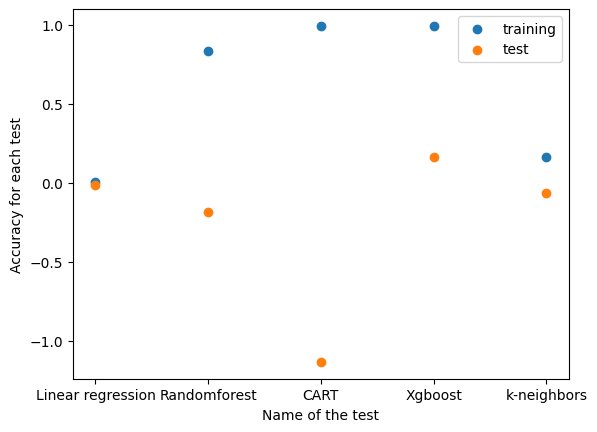

In [49]:
import matplotlib.pyplot as plt

Test_names = ['Linear regression', 'Randomforest', 'CART', 'Xgboost',
              'k-neighbors']
name_code = ['LR', 'RF', 'CART', 'xG', 'k-N']

training = []
test = []

training.append(model_lreg.score(X_train, y_train))
training.append(model_rfr.score(X_train, y_train)) 
training.append(model_cart.score(X_train, y_train))
training.append(model_xg.score(X_train, y_train))
training.append(model_knr.score(X_train, y_train))

test.append(model_lreg.score(X_test, y_test))
test.append(model_rfr.score(X_test, y_test)) 
test.append(model_cart.score(X_test, y_test))
test.append(model_xg.score(X_test, y_test))
test.append(model_knr.score(X_test, y_test))

plt.scatter(Test_names,training,label='training')
plt.scatter(Test_names,test,label='test')
plt.xlabel('Name of the test')
plt.ylabel('Accuracy for each test')
plt.legend()
plt.savefig('initial-model-accuracy-comparisons.png')

In [ ]:
#According to the training and test accuracies we can decide the XGBoost is better than others to train and test our dataset

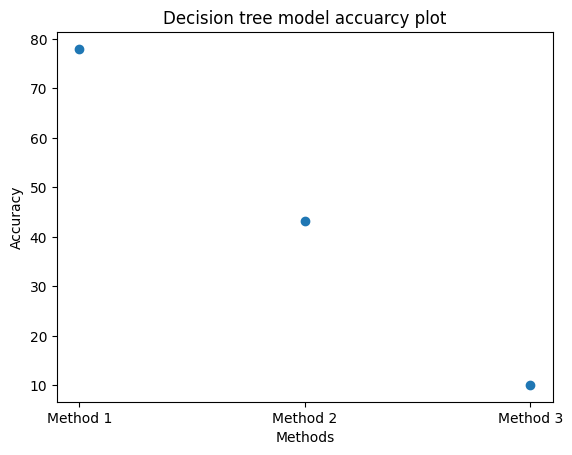

In [74]:
methods = ['Method 1', 'Method 2', 'Method 3']

accuracy = [77.98, 43.12, 10.09]

plt.scatter(methods,accuracy)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Decision tree model accuarcy plot')
plt.savefig('decision-tree-accuracy.png')

# Feature Importance

# Association

In [ ]:
Find how frequently 